#Reliability of Prediction

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install interpret -q

from interpret import set_visualize_provider
from interpret.provider import InlineProvider
set_visualize_provider(InlineProvider())

from interpret import show
from interpret.blackbox import LimeTabular
from interpret.blackbox import ShapKernel


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 65.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 60.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 68.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.0/758.0 kB 40.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 20.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 73.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.4 MB/s eta 0

Dieabetes Prediction Dataset

In [ ]:
file = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/diabetes_prediction_dataset.csv')

In [ ]:

file.head()

,gender,age,hypertension,heart_disease,bmi,smoking_history,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,25.19,0,6.6,140,0
1,0,54.0,0,0,27.32,1,6.6,80,0
2,1,28.0,0,0,27.32,0,5.7,158,0
3,0,36.0,0,0,23.45,4,5.0,155,0
4,1,76.0,1,1,20.14,4,4.8,155,0


In [ ]:
import pandas as pd
import numpy as np
from scipy.spatial import distance
from scipy.stats import multivariate_normal

# Define the training dataset
data = {
    'gender': [0, 0, 1, 0, 1],
    'age': [80.0, 54.0, 28.0, 36.0, 76.0],
    'hypertension': [0, 0, 0, 0, 1],
    'heart_disease': [1, 0, 0, 0, 1],
    'bmi': [25.19, 27.32, 27.32, 23.45, 20.14],
    'smoking_history': [0, 1, 0, 4, 4],
    'HbA1c_level': [6.6, 6.6, 5.7, 5.0, 4.8],
    'blood_glucose_level': [140, 80, 158, 155, 155]
}

train_df = pd.DataFrame(data)

# Define the test dataset
test_data = {
    'gender': [1],
    'age': [30.0],
    'hypertension': [0],
    'heart_disease': [0],
    'bmi': [26.5],
    'smoking_history': [0],
    'HbA1c_level': [5.2],
    'blood_glucose_level': [110],
}

test_df = pd.DataFrame(test_data)


# Function to calculate Euclidean Distance
def euclidean_distance(point1, point2):
    return distance.euclidean(point1, point2)

from scipy.spatial import distance
# Function to calculate Mahalanobis Distance
def mahalanobis_distance(test_point, train_data):
    covariance_matrix = np.cov(train_data.values.T)
    inverse_covariance_matrix = np.linalg.inv(covariance_matrix)
    train_mean = train_data.mean().values
    diff = test_point.values - train_mean
    return np.sqrt(np.dot(diff, np.dot(inverse_covariance_matrix, diff)))


# Function to calculate Cosine Similarity
def cosine_similarity(vector1, vector2):
    return np.dot(vector1, vector2) / (np.linalg.norm(vector1) * np.linalg.norm(vector2))


# # Function to calculate Kullback-Leibler (KL) Divergence
# def kl_divergence(train_data, test_point):
#     train_probabilities = train_data['diabetes'].value_counts(normalize=True).sort_index().values
#     test_probability = test_point['diabetes'].values[0]
#     return np.sum(train_probabilities * np.log(train_probabilities / test_probability))


# Calculate distances for the test data point using the defined functions
test_point = test_df.iloc[0]

# Euclidean Distance
euclidean_distances = train_df.apply(lambda row: euclidean_distance(test_point, row), axis=1)

# Mahalanobis Distance
mahalanobis_distances = train_df.apply(lambda row: mahalanobis_distance(test_point, train_df), axis=1)

# Cosine Similarity
cosine_similarities = train_df.apply(lambda row: cosine_similarity(test_point, row), axis=1)

# # Kullback-Leibler (KL) Divergence
# kl_divergences = train_df.apply(lambda row: kl_divergence(train_df, row), axis=1)

# Print the calculated distances for the test data point
print("Euclidean Distances:")
print(euclidean_distances)

print("\nMahalanobis Distances:")
print(mahalanobis_distances)

print("\nCosine Similarities:")
print(cosine_similarities)

# print("\nKL Divergences:")
# print(kl_divergences)


Euclidean Distances:
0    58.358171
1    38.478986
2    48.051248
3    45.687444
4    64.804395
dtype: float64

Mahalanobis Distances:
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
dtype: float64

Cosine Similarities:
0    0.966696
1    0.948912
2    0.994219
3    0.995512
4    0.975966
dtype: float64


<ipython-input-7-d8ed3f860b26>:46: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.dot(diff, np.dot(inverse_covariance_matrix, diff)))
<ipython-input-7-d8ed3f860b26>:46: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.dot(diff, np.dot(inverse_covariance_matrix, diff)))
<ipython-input-7-d8ed3f860b26>:46: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.dot(diff, np.dot(inverse_covariance_matrix, diff)))
<ipython-input-7-d8ed3f860b26>:46: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.dot(diff, np.dot(inverse_covariance_matrix, diff)))
<ipython-input-7-d8ed3f860b26>:46: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.dot(diff, np.dot(inverse_covariance_matrix, diff)))


In [ ]:
X= file[['gender', 'age', 'hypertension', 'heart_disease', 'bmi',
       'smoking_history', 'HbA1c_level', 'blood_glucose_level']].copy()
y = file['diabetes']

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (optional)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                 max_depth=1, random_state=0).fit(X_train, y_train)

y_pred = gbm.predict(X_test)


Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# F1 score
f1 = f1_score(y_test, y_pred)
print("F1 score:", f1)

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print("ROC curve:")
for i in range(len(fpr)):
    print(f"Threshold: {thresholds[i]}, FPR: {fpr[i]}, TPR: {tpr[i]}")


Accuracy: 0.9724
Precision: 0.9800664451827242
Recall: 0.6908665105386417
F1 score: 0.8104395604395604
ROC curve:
Threshold: 2, FPR: 0.0, TPR: 0.0
Threshold: 1, FPR: 0.001312048983162038, TPR: 0.6908665105386417
Threshold: 0, FPR: 1.0, TPR: 1.0


In [ ]:
import shap

# Initialize an explainer object with the trained gbm and feature names
explainer = shap.Explainer(gbm, feature_names=X.columns)

# Calculate SHAP values for all instances in the test set
shap_values = explainer.shap_values(X_test)

# Calculate the global importance of features
global_importance = np.abs(shap_values).mean(axis=0)

# Create a DataFrame to store the global importance values along with feature names
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': global_importance})

# Sort the DataFrame in descending order of importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Change the name of a column
feature_importance_df = feature_importance_df.rename(columns={'Importance': 'Global Importance'})

feature_importance_df

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


,Feature,Global Importance
6,HbA1c_level,2.535528
7,blood_glucose_level,2.286003
1,age,0.876331
4,bmi,0.389420
5,smoking_history,0.252660
0,gender,0.140655
2,hypertension,0.087953
3,heart_disease,0.062454


In [ ]:
import shap
import numpy as np
import pandas as pd
from scipy.stats import entropy
from sklearn.metrics import brier_score_loss

# Initialize an explainer object with the trained gbm and feature names
explainer = shap.Explainer(gbm, feature_names=X.columns)

# Calculate SHAP values for all instances in the test set
shap_values = explainer.shap_values(X_test)

# Calculate the predicted probabilities for the test set
y_pred_proba = gbm.predict_proba(X_test)

# Calculate the entropy for each prediction
entropies = [entropy(probs, base=2) for probs in y_pred_proba]

# Calculate the Brier score for each individual data point
brier_scores = []
for true_label, pred_prob in zip(y_test, y_pred_proba[:, 1]):
    brier_scores.append(brier_score_loss([true_label], [pred_prob], pos_label=1))

# Calculate the logit values for each prediction
logit_class_1 = np.log(y_pred_proba[:, 1] / (1 - y_pred_proba[:, 1]))
# logit_class_2 = np.log(y_pred_proba[:, 0] / (1 - y_pred_proba[:, 0]))

# Create a DataFrame to store the variable importances, entropy, predicted, actual classes, Brier scores, and logit values
importance_df = pd.DataFrame(shap_values, columns=X.columns)
importance_df['Entropy'] = entropies
importance_df['Brier_Score'] = brier_scores
importance_df['logit_class_1'] = logit_class_1
# importance_df['logit_class_2'] = logit_class_2
importance_df['Predicted_Class'] = gbm.predict(X_test)
importance_df['Actual_Class'] = y_test.reset_index(drop=True)


In [ ]:
feature_importance_df

,Feature,Global Importance
6,HbA1c_level,2.535528
7,blood_glucose_level,2.286003
1,age,0.876331
4,bmi,0.389420
5,smoking_history,0.252660
0,gender,0.140655
2,hypertension,0.087953
3,heart_disease,0.062454


In [ ]:
importance_df2=importance_df.copy()

In [ ]:
importance_df2[['gender', 'age', 'hypertension', 'heart_disease', 'bmi',
       'smoking_history', 'HbA1c_level', 'blood_glucose_level']]=importance_df2[['gender', 'age', 'hypertension', 'heart_disease', 'bmi',
       'smoking_history', 'HbA1c_level', 'blood_glucose_level']].abs()

In [ ]:
importance_df2.head()

,gender,age,hypertension,heart_disease,bmi,smoking_history,HbA1c_level,blood_glucose_level,Entropy,Brier_Score,logit_class_1,Predicted_Class,Actual_Class
0,0.120400,1.098567,0.048934,0.033257,0.698270,0.352142,1.310655,0.807887,0.035927,1.434947e-05,-5.572103,0,0
1,0.120400,1.098567,0.048934,0.033257,0.698270,0.352142,3.345028,0.807887,0.000586,1.306851e-09,-10.227786,0,0
2,0.169599,1.054696,0.048934,0.033257,0.297615,0.151951,3.345028,0.860887,0.012232,1.173265e-06,-6.826776,0,0
3,0.120400,1.098567,0.048934,0.033257,0.698270,0.175952,1.310655,0.807887,0.055893,4.104369e-05,-5.044010,0,0
4,0.120400,0.505400,0.048934,0.033257,1.200790,0.151951,1.248142,0.860887,0.366262,8.647313e-01,-2.585296,0,1


In [ ]:
# Step 1: Map column names from feature_importance_df to importance_df2
column_mapping = dict(zip(feature_importance_df['Feature'], feature_importance_df['Global Importance']))

# Step 2: Create a new dataframe with the differences
df_difference = importance_df2.copy()
for column in df_difference.columns:
    if column in column_mapping:
        df_difference[column] =(df_difference[column] - column_mapping[column]).abs()

df_difference.head()

,gender,age,hypertension,heart_disease,bmi,smoking_history,HbA1c_level,blood_glucose_level,Entropy,Brier_Score,logit_class_1,Predicted_Class,Actual_Class
0,0.020255,0.222237,0.039019,0.029197,0.308849,0.099482,1.224873,1.478115,0.035927,1.434947e-05,-5.572103,0,0
1,0.020255,0.222237,0.039019,0.029197,0.308849,0.099482,0.809500,1.478115,0.000586,1.306851e-09,-10.227786,0,0
2,0.028943,0.178366,0.039019,0.029197,0.091806,0.100708,0.809500,1.425116,0.012232,1.173265e-06,-6.826776,0,0
3,0.020255,0.222237,0.039019,0.029197,0.308849,0.076708,1.224873,1.478115,0.055893,4.104369e-05,-5.044010,0,0
4,0.020255,0.370930,0.039019,0.029197,0.811369,0.100708,1.287386,1.425116,0.366262,8.647313e-01,-2.585296,0,1


In [ ]:
# Given data
weights = {
    'HbA1c_level': 2.535528,
    'blood_glucose_level': 2.286003,
    'age': 0.876331,
    'bmi': 0.38942,
    'smoking_history': 0.25266,
    'gender': 0.140655,
    'hypertension': 0.087953,
    'heart_disease': 0.062454
}

# Calculate the weighted sum
weighted_sum = df_difference[['HbA1c_level', 'blood_glucose_level', 'age', 'bmi', 'smoking_history', 'gender', 'hypertension', 'heart_disease']].mul(list(weights.values())).sum(axis=1)

# Add the new column to df_difference
df_difference['Weighted_Sum'] = weighted_sum

df_difference.head()

In [ ]:
df_difference.head()

In [ ]:
accurate_df = df_difference[df_difference['Predicted_Class'] == df_difference['Actual_Class']].copy()
inaccurate_df = df_difference[df_difference['Predicted_Class'] != df_difference['Actual_Class']].copy()

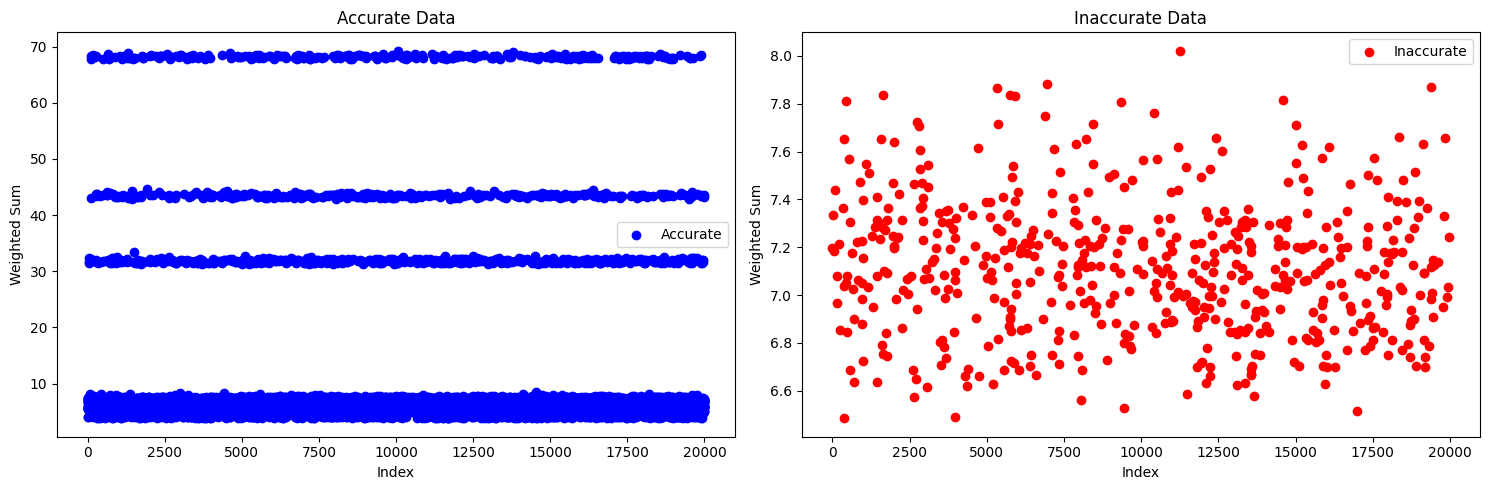

In [ ]:
import matplotlib.pyplot as plt

# Creating separate scatter plot for Weighted sub in accurate_df and inaccurate_df
plt.figure(figsize=(15, 5))  # Set the figure size to adjust the width of the histograms

# scatter plot for accurate_df
plt.subplot(1, 2, 1)  # Creating the first subplot
plt.scatter(accurate_df.index,accurate_df['Weighted_Sum'] , c ="blue", label="Accurate")
plt.xlabel("Index")
plt.ylabel("Weighted Sum")
# plt.yscale('log')
plt.title("Accurate Data")
plt.legend()

# scatterplot for inaccurate_df
plt.subplot(1, 2, 2)  # Creating the second subplot
plt.scatter(inaccurate_df.index,inaccurate_df['Weighted_Sum'] , c ="red", label="Inaccurate")
plt.xlabel("Index")
plt.ylabel("Weighted Sum")
plt.title("Inaccurate Data")
plt.legend()

# Adjust the layout to prevent overlapping titles and labels
plt.tight_layout()

# Show the plots
plt.show()



In [ ]:
inaccurate_df.index

Int64Index([    4,    15,    53,    78,   144,   158,   205,   233,   332,
              379,
            ...
            19440, 19445, 19478, 19616, 19787, 19797, 19823, 19912, 19921,
            19972],
           dtype='int64', length=552)

In [ ]:
inaccurate_df

,gender,age,hypertension,heart_disease,bmi,smoking_history,HbA1c_level,blood_glucose_level,Entropy,Brier_Score,logit_class_1,Predicted_Class,Actual_Class,Weighted_Sum
4,0.020255,0.370930,0.039019,0.029197,0.811369,0.100708,1.287386,1.425116,0.366262,0.864731,-2.585296,0,1,7.196592
15,0.028943,0.485091,0.039019,0.029197,0.091806,0.099482,1.364787,1.478115,0.372110,0.861804,-2.561375,0,1,7.334745
53,0.028943,0.554187,0.039019,0.740159,0.344759,0.100708,1.224873,1.478115,0.903035,0.464080,-0.759448,0,1,7.183757
78,0.028943,0.485091,0.509001,0.740159,0.173731,0.052446,1.364787,1.478115,0.998510,0.273234,0.090935,1,0,7.440503
144,0.028943,0.062909,0.039019,0.029197,1.012774,0.099482,1.224873,1.478115,0.758918,0.609466,-1.269651,0,1,6.968661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19797,0.020255,0.485091,0.039019,0.029197,0.081138,0.100708,1.364787,1.478115,0.607677,0.723967,-1.741383,0,1,7.329679
19823,0.020255,0.554187,0.039019,0.029197,1.671989,0.100708,1.224873,1.478115,0.991265,0.307987,0.220754,1,0,7.654983
19912,0.020255,0.485091,0.039019,0.029197,0.453379,0.076708,1.224873,1.425116,0.842784,0.531556,-0.989953,0,1,6.992659
19921,0.028943,0.178366,0.039019,0.029197,0.811369,0.100708,1.242363,1.478115,0.906875,0.459264,-0.743178,0,1,7.036065


In [ ]:
# Filter data points within the specified range (6.6 to 7.8)
filtered_data_within_range = accurate_df[(accurate_df['Weighted_Sum'] >= 6.6) & (accurate_df['Weighted_Sum'] <= 7.8)]

# Count the number of data points within the range
num_data_within_range = len(filtered_data_within_range)

# Count the number of data points outside the range
num_data_outside_range = len(accurate_df) - num_data_within_range

print("Number of data points within the range (6.6 to 7.8):", num_data_within_range)
print("Number of data points outside the range:", num_data_outside_range)


Number of data points within the range (6.6 to 7.8): 9437
Number of data points outside the range: 10011


In [ ]:
importance_df.head()

,gender,age,hypertension,heart_disease,bmi,smoking_history,HbA1c_level,blood_glucose_level,Entropy,Brier_Score,logit_class_1,Predicted_Class,Actual_Class
0,-0.120400,-1.098567,-0.048934,-0.033257,-0.698270,-0.352142,1.310655,0.807887,0.035927,1.434947e-05,-5.572103,0,0
1,-0.120400,-1.098567,-0.048934,-0.033257,-0.698270,-0.352142,-3.345028,0.807887,0.000586,1.306851e-09,-10.227786,0,0
2,0.169599,1.054696,-0.048934,-0.033257,-0.297615,0.151951,-3.345028,0.860887,0.012232,1.173265e-06,-6.826776,0,0
3,-0.120400,-1.098567,-0.048934,-0.033257,-0.698270,0.175952,1.310655,0.807887,0.055893,4.104369e-05,-5.044010,0,0
4,-0.120400,-0.505400,-0.048934,-0.033257,1.200790,0.151951,1.248142,0.860887,0.366262,8.647313e-01,-2.585296,0,1


----


In [ ]:
importance_df.head()

,gender,age,hypertension,heart_disease,bmi,smoking_history,HbA1c_level,blood_glucose_level,Entropy,Brier_Score,logit_class_1,Predicted_Class,Actual_Class
0,-0.120400,-1.098567,-0.048934,-0.033257,-0.698270,-0.352142,1.310655,0.807887,0.035927,1.434947e-05,-5.572103,0,0
1,-0.120400,-1.098567,-0.048934,-0.033257,-0.698270,-0.352142,-3.345028,0.807887,0.000586,1.306851e-09,-10.227786,0,0
2,0.169599,1.054696,-0.048934,-0.033257,-0.297615,0.151951,-3.345028,0.860887,0.012232,1.173265e-06,-6.826776,0,0
3,-0.120400,-1.098567,-0.048934,-0.033257,-0.698270,0.175952,1.310655,0.807887,0.055893,4.104369e-05,-5.044010,0,0
4,-0.120400,-0.505400,-0.048934,-0.033257,1.200790,0.151951,1.248142,0.860887,0.366262,8.647313e-01,-2.585296,0,1


In [ ]:
sample_data = X_test.reset_index()
sample_data.drop('index',axis=1,inplace=True)

In [ ]:
def Reliability_results(index):
    table1 = importance_df
    table2 = feature_importance_df

    # Function to generate the table for all features
    def generate_table(index):
        result_table = pd.DataFrame(columns=['Feature', 'Global Importance', 'Local Importance'])
        for feature in table2['Feature']:
            importance_table2 = table2.loc[table2['Feature'] == feature, 'Global Importance'].values[0]
            importance_table1 = table1.loc[index, feature]
            result_table = pd.concat([result_table, pd.DataFrame({'Feature': [feature],
                                                                  'Global Importance': [importance_table2],
                                                                  'Local Importance': [importance_table1]})], ignore_index=True)
        return result_table

    # Generate the table for all features
    print("Actual Class: ",table1['Actual_Class'][index])
    print("Predicted Class: ",table1['Predicted_Class'][index])
    print("Entropy: ", table1['Entropy'][index])
    print("Logit Value: ",table1['logit_class_1'][index])
    print("Brier Scores",table1['Brier_Score'][index])
    print("------------------------------------------------------")
    result_table = generate_table(index)
    print(result_table)


In [ ]:
Reliability_results(2500)

Actual Class:  0
Predicted Class:  0
Entropy:  0.6545770977871301
Logit Value:  -1.5953186551019227
Brier Scores 0.028438409003352903
------------------------------------------------------
               Feature  Global Importance  Local Importance
0          HbA1c_level           2.535528          1.310655
1  blood_glucose_level           2.286003          0.807887
2                  age           0.876331          1.430517
3                  bmi           0.389420         -0.044661
4      smoking_history           0.252660          0.151951
5               gender           0.140655          0.169599
6         hypertension           0.087953         -0.048934
7        heart_disease           0.062454         -0.033257


In [ ]:
# sample_data[40:50]

In [ ]:
Reliability_results(4)

Actual Class:  1
Predicted Class:  0
Entropy:  0.3662621440208885
Logit Value:  -2.585296485938457
Brier Scores 0.8647312515627416
------------------------------------------------------
               Feature  Global Importance  Local Importance
0          HbA1c_level           2.535528          1.248142
1  blood_glucose_level           2.286003          0.860887
2                  age           0.876331         -0.505400
3                  bmi           0.389420          1.200790
4      smoking_history           0.252660          0.151951
5               gender           0.140655         -0.120400
6         hypertension           0.087953         -0.048934
7        heart_disease           0.062454         -0.033257


In [ ]:
for i in range(5):
  print("\n\nPrediction: ",i)
  print("------------------------------------------------------")
  Reliability_results(i)



Prediction:  0
------------------------------------------------------
Actual Class:  0
Predicted Class:  0
Entropy:  0.03592711642640778
Logit Value:  -5.572103410579944
Brier Scores 1.4349472922054758e-05
------------------------------------------------------
               Feature  Global Importance  Local Importance
0          HbA1c_level           2.535528          1.310655
1  blood_glucose_level           2.286003          0.807887
2                  age           0.876331         -1.098567
3                  bmi           0.389420         -0.698270
4      smoking_history           0.252660         -0.352142
5               gender           0.140655         -0.120400
6         hypertension           0.087953         -0.048934
7        heart_disease           0.062454         -0.033257


Prediction:  1
------------------------------------------------------
Actual Class:  0
Predicted Class:  0
Entropy:  0.0005855749603477856
Logit Value:  -10.22778636605462
Brier Scores 1.30685149

In [ ]:
Reliability_results(39)

Actual Class:  1
Predicted Class:  1
Entropy:  0.0005866515864401501
Logit Value:  10.225769782651852
Brier Scores 1.312132693290027e-09
------------------------------------------------------
               Feature  Global Importance  Local Importance
0          HbA1c_level           2.535528         13.547662
1  blood_glucose_level           2.286003          0.807887
2                  age           0.876331         -0.166259
3                  bmi           0.389420          1.402194
4      smoking_history           0.252660          0.175952
5               gender           0.140655         -0.120400
6         hypertension           0.087953         -0.048934
7        heart_disease           0.062454         -0.033257


In [ ]:
Reliability_results(101)

Actual Class:  1
Predicted Class:  1
Entropy:  8.672561355826395e-07
Logit Value:  17.227368598578277
Brier Scores 1.0876714555118346e-15
------------------------------------------------------
               Feature  Global Importance  Local Importance
0          HbA1c_level           2.535528          1.310655
1  blood_glucose_level           2.286003         19.663376
2                  age           0.876331          1.054696
3                  bmi           0.389420          0.145204
4      smoking_history           0.252660          0.305106
5               gender           0.140655          0.169599
6         hypertension           0.087953         -0.048934
7        heart_disease           0.062454         -0.033257


In [ ]:
Reliability_results(144)

Actual Class:  1
Predicted Class:  0
Entropy:  0.7589182501437473
Logit Value:  -1.2696514919483453
Brier Scores 0.6094660764628984
------------------------------------------------------
               Feature  Global Importance  Local Importance
0          HbA1c_level           2.535528          1.310655
1  blood_glucose_level           2.286003          0.807887
2                  age           0.876331          0.813422
3                  bmi           0.389420          1.402194
4      smoking_history           0.252660         -0.352142
5               gender           0.140655          0.169599
6         hypertension           0.087953         -0.048934
7        heart_disease           0.062454         -0.033257


In [ ]:
Reliability_results(956)

Actual Class:  0
Predicted Class:  1
Entropy:  0.999812191752215
Logit Value:  0.032273296255384595
Brier Scores 0.258132710383598
------------------------------------------------------
               Feature  Global Importance  Local Importance
0          HbA1c_level           2.535528          1.293165
1  blood_glucose_level           2.286003          0.807887
2                  age           0.876331          1.506894
3                  bmi           0.389420          0.308283
4      smoking_history           0.252660          0.175952
5               gender           0.140655         -0.120400
6         hypertension           0.087953          0.596954
7        heart_disease           0.062454          0.802614


In [ ]:
Reliability_results(10430)

Actual Class:  0
Predicted Class:  1
Entropy:  0.9987295423855053
Logit Value:  0.08397096423367824
Brier Scores 0.27142059234496724
------------------------------------------------------
               Feature  Global Importance  Local Importance
0          HbA1c_level           2.535528          1.310655
1  blood_glucose_level           2.286003          0.860887
2                  age           0.876331          0.114866
3                  bmi           0.389420          2.061410
4      smoking_history           0.252660          0.151951
5               gender           0.140655          0.169599
6         hypertension           0.087953         -0.048934
7        heart_disease           0.062454          0.802614


In [ ]:
import shap
shap.initjs()

X100 = shap.utils.sample(X_test, 31)

# compute the SHAP values for the linear gbm
explainer = shap.Explainer(gbm.predict, X100)
shap_values1 = explainer(X_test)

Exact explainer: 20001it [03:38, 89.41it/s]                            


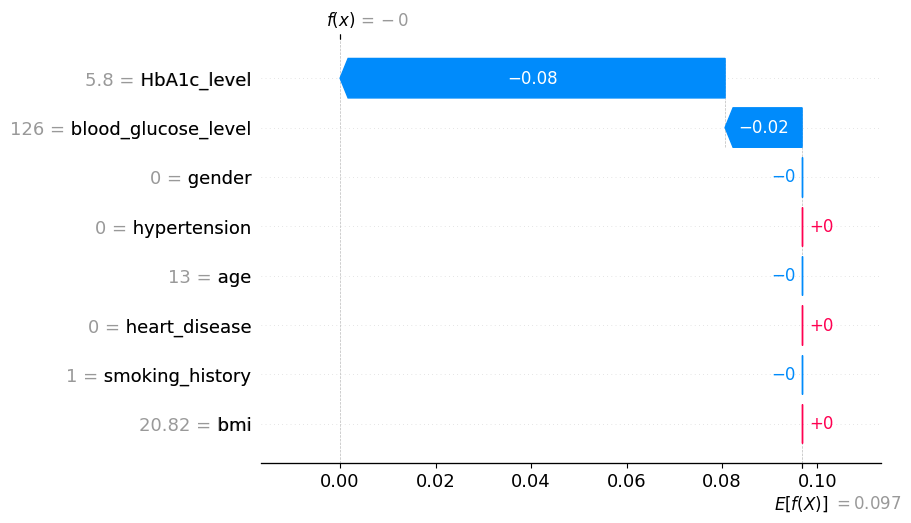

In [ ]:
shap.plots.waterfall(shap_values1[0], max_display=14)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


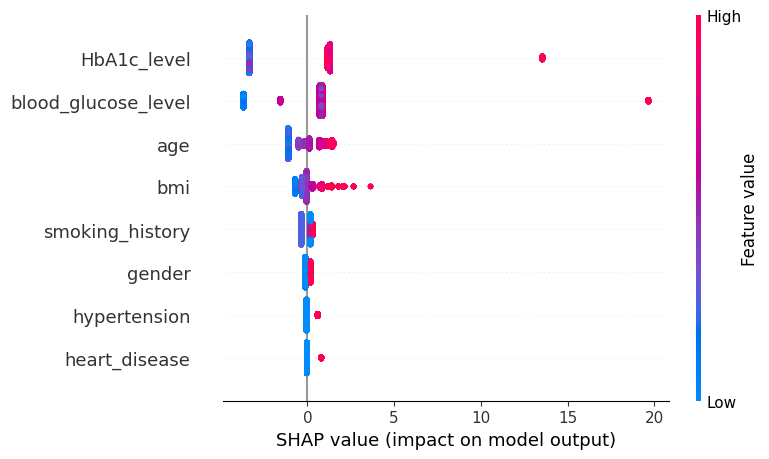

In [ ]:
shap.summary_plot(shap_values, X_test)

In [ ]:
# importance_df.head()

In [ ]:
# importance_df.to_excel('importance_df.xlsx', index=True)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

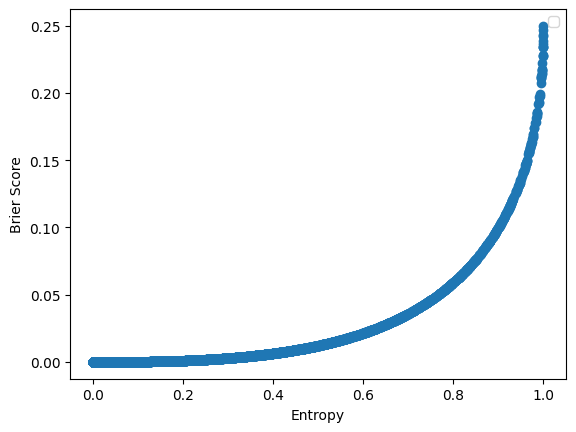

In [ ]:
filtered_df = importance_df[importance_df['Predicted_Class'] == importance_df['Actual_Class']]

# plt.plot(filtered_df[:500]['HbA1c_level'], label='HbA1c_level')
# plt.plot(filtered_df[:500]['Brier_Score'], label='Brier Score')
plt.scatter(filtered_df['Entropy'], filtered_df['Brier_Score'])
plt.xlabel('Entropy')
plt.ylabel('Brier Score')
# plt.yscale('log')
plt.legend()
plt.show()


In [ ]:
accurate_df = importance_df[importance_df['Predicted_Class'] == importance_df['Actual_Class']]
inaccurate_df = importance_df[importance_df['Predicted_Class'] != importance_df['Actual_Class']]

In [ ]:
import matplotlib.pyplot as plt

def plot_scatter(df = None, x=None, y=None,title='Scatter Plot'):
    plt.scatter(df[x], df[y])
    plt.title(title)
    plt.xlabel(str(x))
    plt.xscale('log')
    plt.ylabel(str(y))
    plt.show()


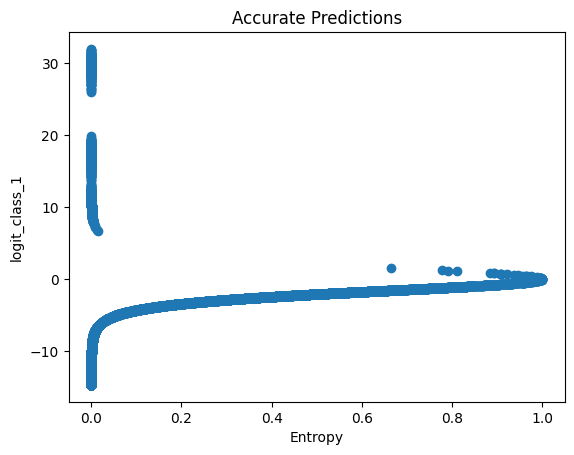

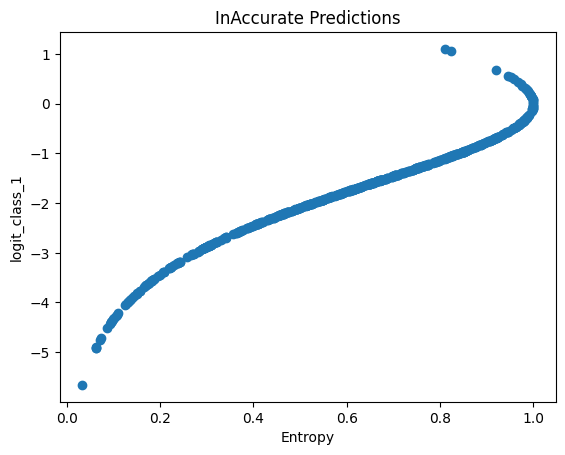

In [ ]:
def plot_scatter(df = None, x=None, y=None,title='Scatter Plot'):
    plt.scatter(df[x], df[y])
    plt.title(title)
    plt.xlabel(str(x))
    # plt.xscale('log')
    # plt.yscale('log')
    plt.ylabel(str(y))
    plt.show()
plot_scatter(accurate_df,'Entropy','logit_class_1','Accurate Predictions')
plot_scatter(inaccurate_df,'Entropy','logit_class_1','InAccurate Predictions')

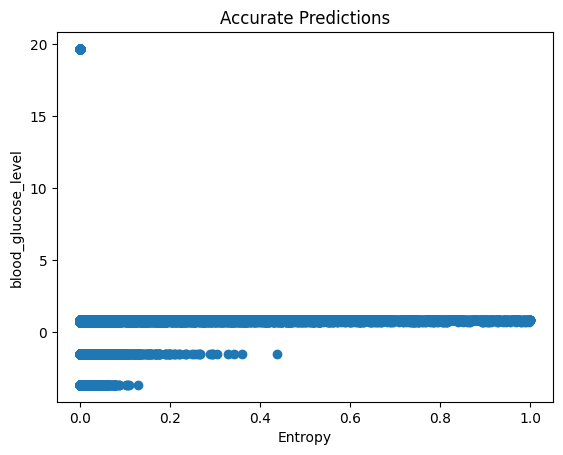

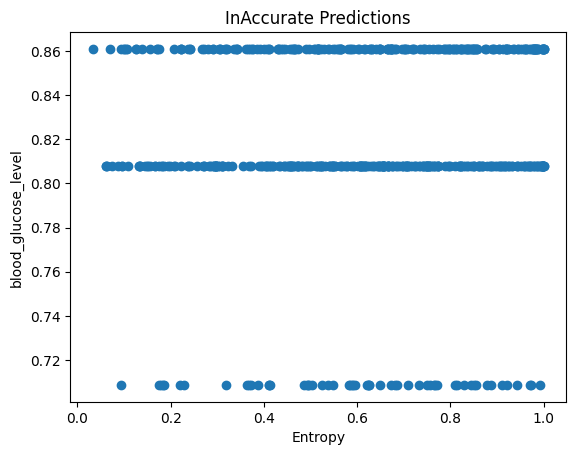

In [ ]:
plot_scatter(accurate_df,'Entropy','blood_glucose_level','Accurate Predictions')
plot_scatter(inaccurate_df,'Entropy','blood_glucose_level','InAccurate Predictions')

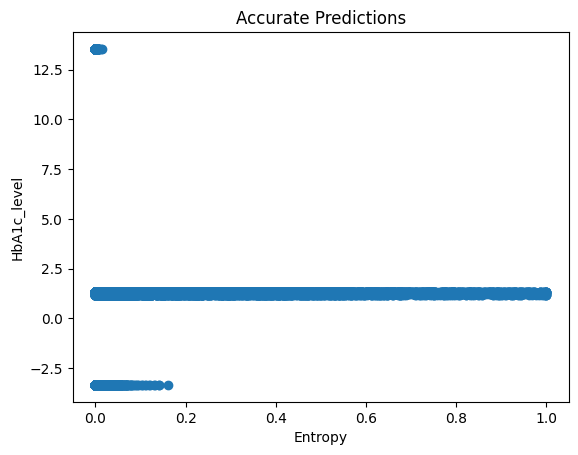

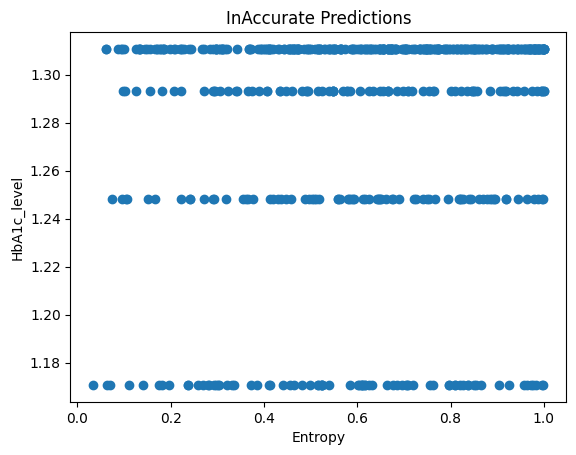

In [ ]:
plot_scatter(accurate_df,'Entropy','HbA1c_level','Accurate Predictions')
plot_scatter(inaccurate_df,'Entropy','HbA1c_level','InAccurate Predictions')

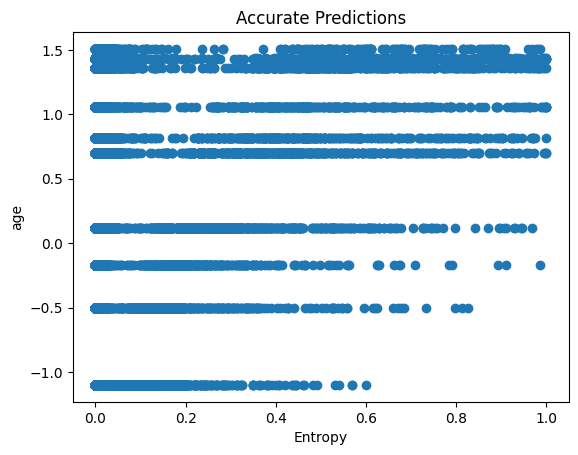

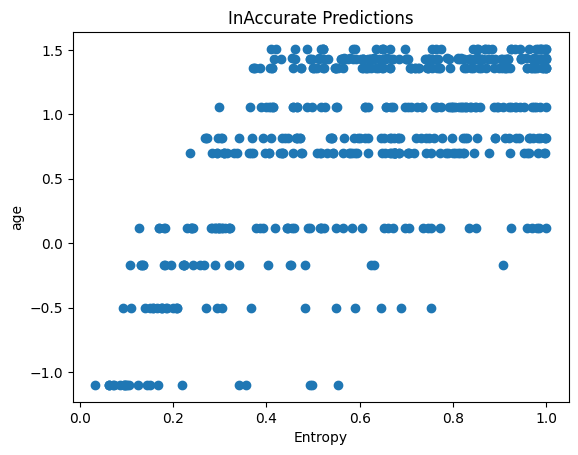

In [ ]:
plot_scatter(accurate_df,'Entropy','age','Accurate Predictions')
plot_scatter(inaccurate_df,'Entropy','age','InAccurate Predictions')

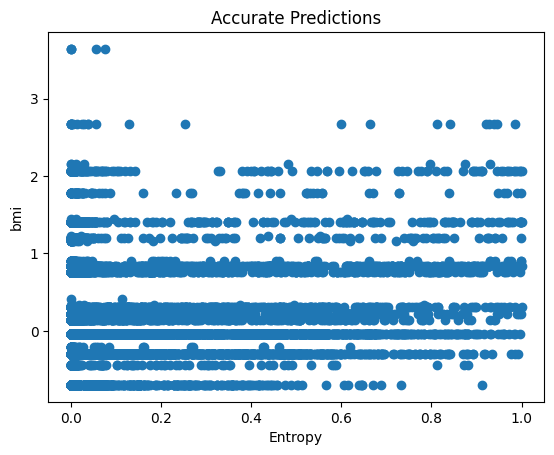

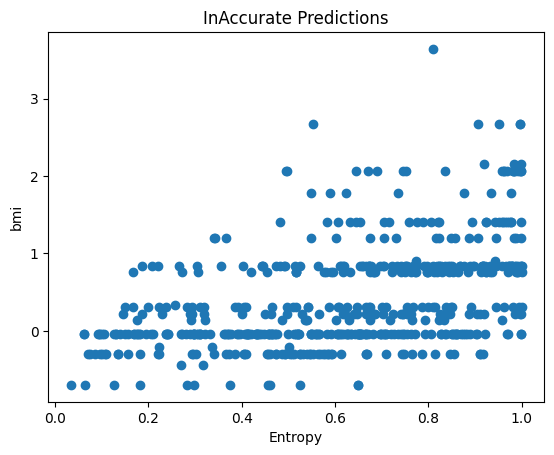

In [ ]:
plot_scatter(accurate_df,'Entropy','bmi','Accurate Predictions')
plot_scatter(inaccurate_df,'Entropy','bmi','InAccurate Predictions')

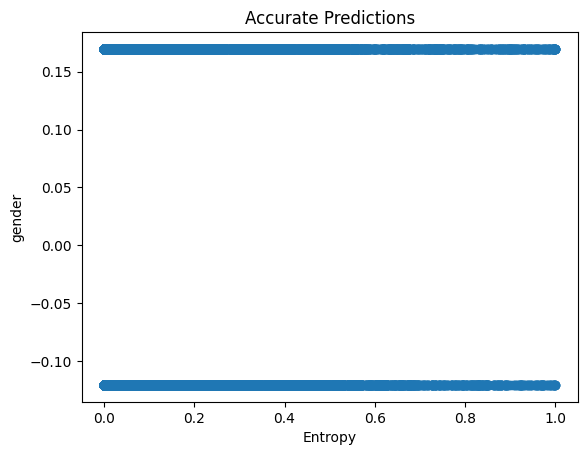

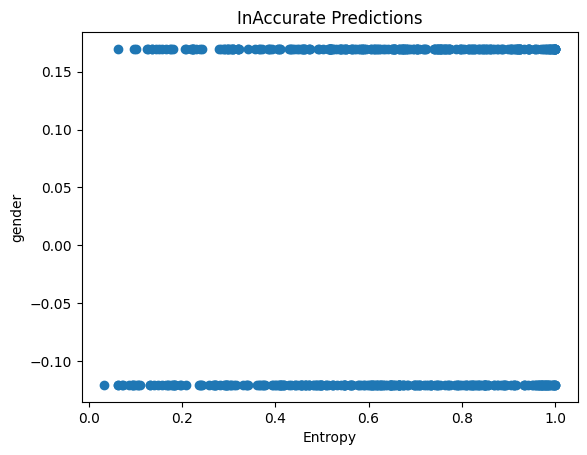

In [ ]:
plot_scatter(accurate_df,'Entropy','gender','Accurate Predictions')
plot_scatter(inaccurate_df,'Entropy','gender','InAccurate Predictions')

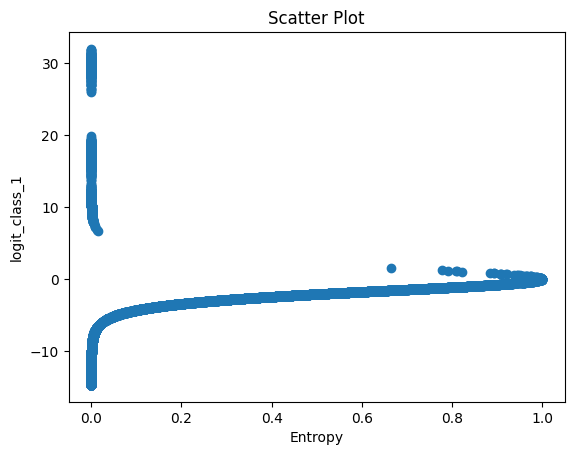

In [ ]:
import matplotlib.pyplot as plt

def plot_scatter(df = None, x=None, y=None,title='Scatter Plot'):
    plt.scatter(df[x], df[y])
    plt.title(title)
    plt.xlabel(str(x))
    # plt.xscale('log')
    plt.ylabel(str(y))
    plt.show()

plot_scatter(importance_df,'Entropy','logit_class_1')

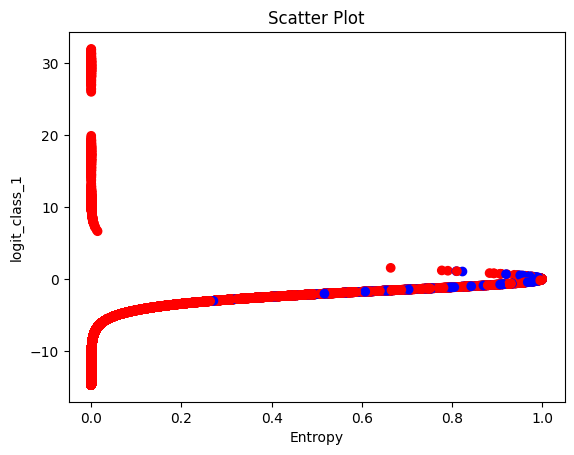

In [ ]:
def plot_scatter(df=None, x=None, y=None, title='Scatter Plot'):
    # Create a color array based on the condition Predicted_Class == Actual_Class
    colors = ['red' if p == a else 'blue' for p, a in zip(df['Predicted_Class'], df['Actual_Class'])]

    plt.scatter(df[x], df[y], c=colors)  # Use the colors array for coloring the points
    plt.title(title)
    plt.xlabel(str(x))
    plt.ylabel(str(y))
    # plt.xscale('log')
    plt.show()

plot_scatter(importance_df, 'Entropy', 'logit_class_1')

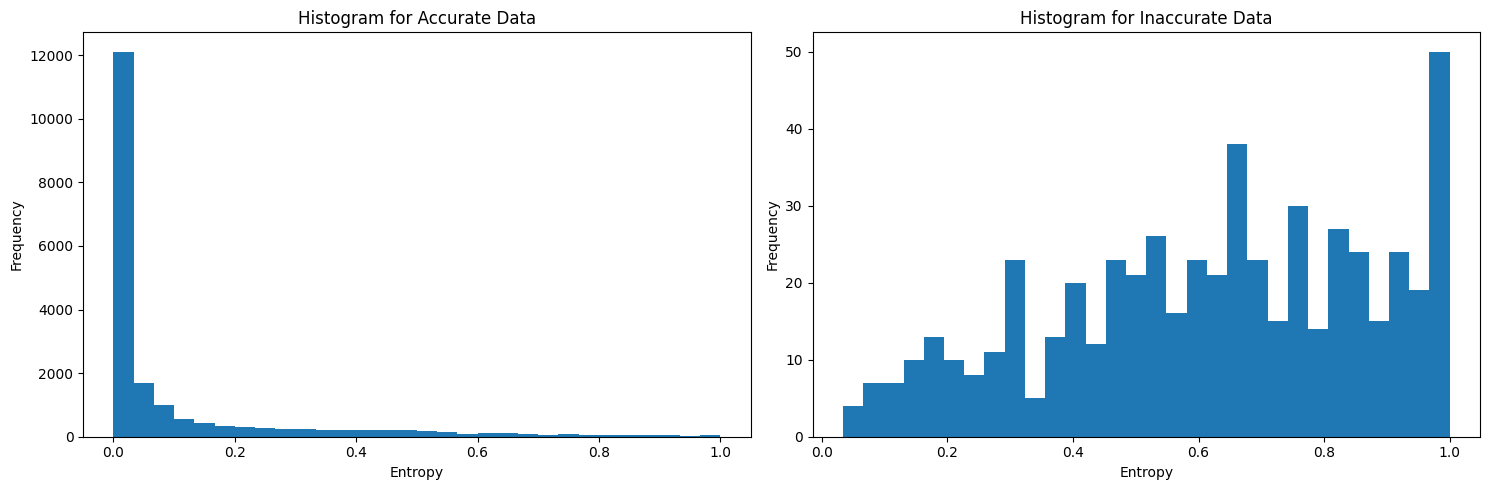

In [ ]:
# accurate_entropy = accurate_df['Entropy']
# inaccurate_entropy = inaccurate_df['Entropy']

# Creating separate histograms for accurate_df and inaccurate_df
plt.figure(figsize=(15, 5))  # Set the figure size to adjust the width of the histograms

# Histogram for accurate_df
plt.subplot(1, 2, 1)  # Creating the first subplot
plt.hist(accurate_df['Entropy'], bins=30)
plt.xlabel('Entropy')
plt.ylabel('Frequency')
plt.title('Histogram for Accurate Data')

# Histogram for inaccurate_df
plt.subplot(1, 2, 2)  # Creating the second subplot
plt.hist(inaccurate_df['Entropy'], bins=30)
plt.xlabel('Entropy')
plt.ylabel('Frequency')
plt.title('Histogram for Inaccurate Data')

# Adjust the layout to prevent overlapping titles and labels
plt.tight_layout()

# Show the plots
plt.show()


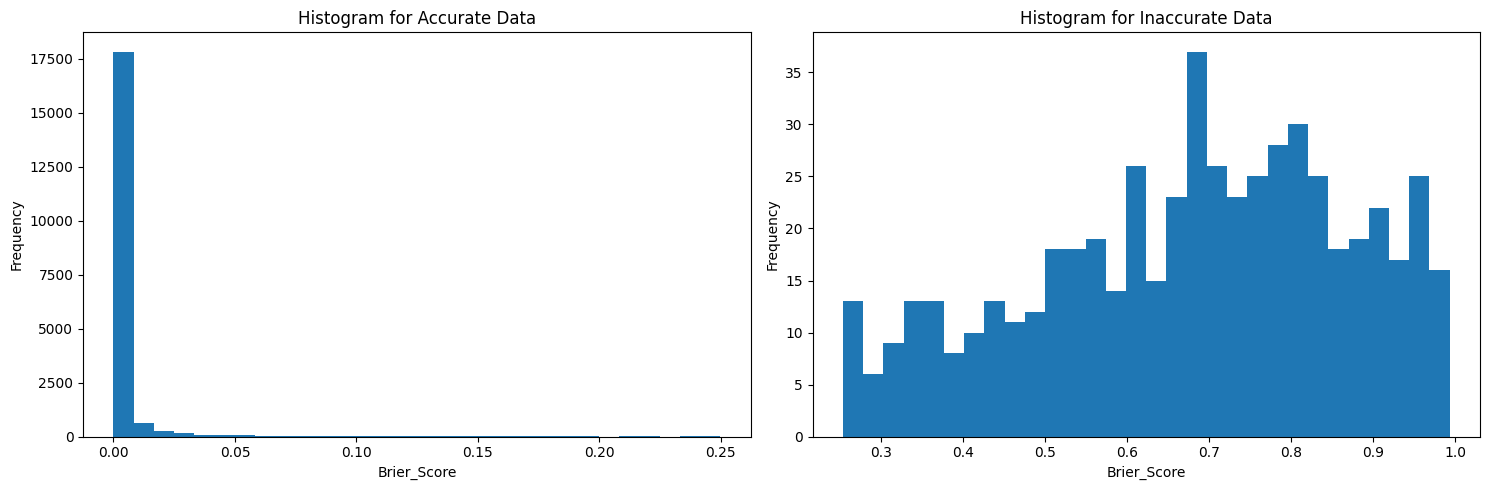

In [ ]:
# accurate_brier_scores = accurate_df['Brier_Score']
# inaccurate_brier_scores = inaccurate_df['Brier_Score']

# Creating separate histograms for accurate_df and inaccurate_df
plt.figure(figsize=(15, 5))  # Set the figure size to adjust the width of the histograms

# Histogram for accurate_df
plt.subplot(1, 2, 1)  # Creating the first subplot
plt.hist(accurate_df['Brier_Score'], bins=30)
plt.xlabel('Brier_Score')
plt.ylabel('Frequency')
plt.title('Histogram for Accurate Data')

# Histogram for inaccurate_df
plt.subplot(1, 2, 2)  # Creating the second subplot
plt.hist(inaccurate_df['Brier_Score'], bins=30)
plt.xlabel('Brier_Score')
plt.ylabel('Frequency')
plt.title('Histogram for Inaccurate Data')

# Adjust the layout to prevent overlapping titles and labels
plt.tight_layout()

# Show the plots
plt.show()

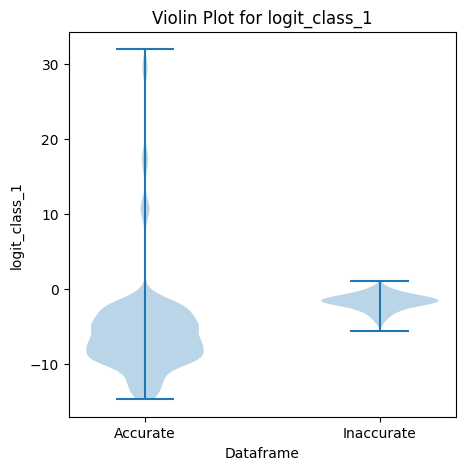

In [ ]:
# Combine both dataframes into a list to pass to the violinplot function
data = [accurate_df['logit_class_1'], inaccurate_df['logit_class_1']]
plt.figure(figsize=(5, 5))
# Creating the violin plot
plt.violinplot(data,
               showmeans=False,
               showmedians=False)

# Customizing the plot
plt.xticks([1, 2], ['Accurate', 'Inaccurate'])
plt.xlabel('Dataframe')
plt.ylabel('logit_class_1')
plt.title('Violin Plot for logit_class_1')

# Show the plot
plt.show()

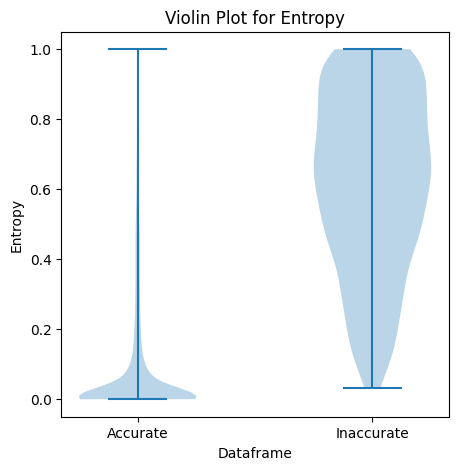

In [ ]:
# Combine both dataframes into a list to pass to the violinplot function
data = [accurate_df['Entropy'], inaccurate_df['Entropy']]
plt.figure(figsize=(5, 5))
# Creating the violin plot
plt.violinplot(data,
               showmeans=False,
               showmedians=False)

# Customizing the plot
plt.xticks([1, 2], ['Accurate', 'Inaccurate'])
plt.xlabel('Dataframe')
plt.ylabel('Entropy')
plt.title('Violin Plot for Entropy')

# Show the plot
plt.show()

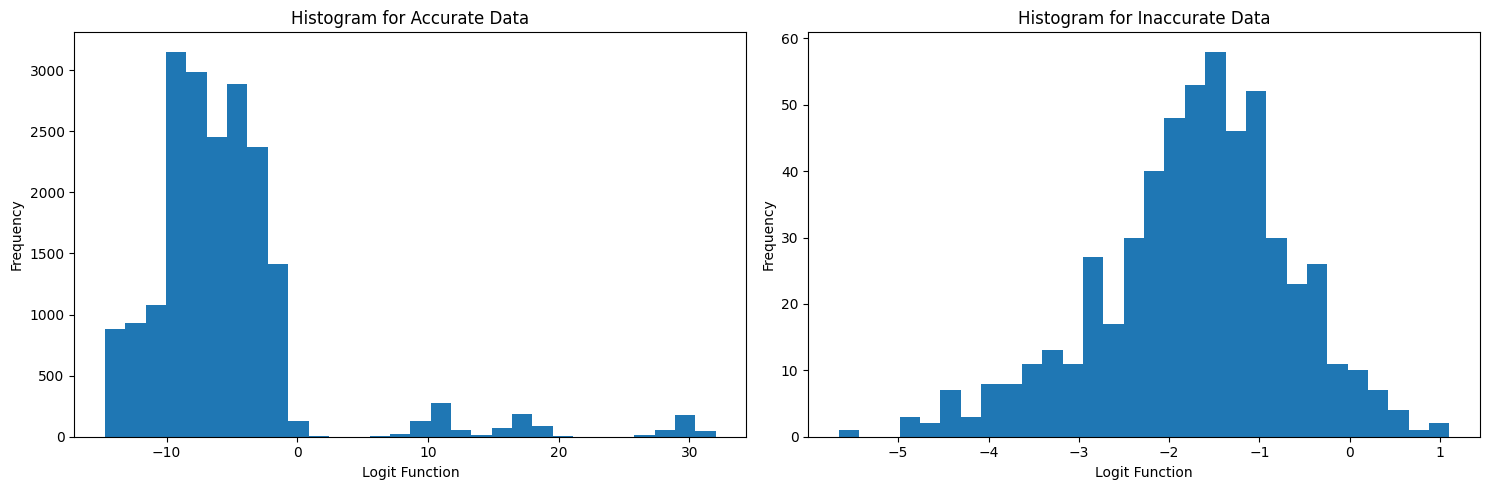

In [ ]:
# Creating separate histograms for accurate_df and inaccurate_df
plt.figure(figsize=(15, 5))  # Set the figure size to adjust the width of the histograms

# Histogram for accurate_df
plt.subplot(1, 2, 1)  # Creating the first subplot
plt.hist(accurate_df['logit_class_1'], bins=30)
plt.xlabel('Logit Function')
plt.ylabel('Frequency')
plt.title('Histogram for Accurate Data')

# Histogram for inaccurate_df
plt.subplot(1, 2, 2)  # Creating the second subplot
plt.hist(inaccurate_df['logit_class_1'], bins=30)
plt.xlabel('Logit Function')
plt.ylabel('Frequency')
plt.title('Histogram for Inaccurate Data')

# Adjust the layout to prevent overlapping titles and labels
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# Sample DataFrame
data = {
    'Column1': [1, 2, np.nan, 4],
    'Column2': [np.nan, 2, 3, np.nan],
    'Column3': [1, 2, 3, 4]
}
df = pd.DataFrame(data)

# Count the number of NaN values in each row
df['numNaN'] = df.isna().sum(axis=1)

print(df)


   Column1  Column2  Column3  numNaN
0      1.0      NaN        1       1
1      2.0      2.0        2       0
2      NaN      3.0        3       1
3      4.0      NaN        4       1


In [ ]:
import pandas as pd
import numpy as np

# Sample DataFrame
data = {
    'Column1': [1, 2, np.nan, 4],
    'Column2': [np.nan, 2, 3, np.nan],
    'Column3': [np.nan, 2, 3, 4]
}
df = pd.DataFrame(data)

# Weight dictionary
weight_dict = {'Column1': 2, 'Column2': 3, 'Column3': 1}

# Calculate the weighted NaN count for each row
def calculate_weighted_nan_count(row):
    weighted_nan_count = 0
    for col, weight in weight_dict.items():
        if pd.isna(row[col]):
            weighted_nan_count += weight
    return weighted_nan_count

df['weighted_NaN_counts'] = df.apply(calculate_weighted_nan_count, axis=1)

print(df)


   Column1  Column2  Column3  weighted_NaN_counts
0      1.0      NaN      NaN                    4
1      2.0      2.0      2.0                    0
2      NaN      3.0      3.0                    2
3      4.0      NaN      4.0                    3


#Extras

In [ ]:
# import shap
# import numpy as np
# import pandas as pd
# from scipy.stats import entropy
# from sklearn.metrics import brier_score_loss

# # Initialize an explainer object with the trained gbm and feature names
# explainer = shap.Explainer(gbm, feature_names=X.columns)

# # Calculate SHAP values for all instances in the test set
# shap_values = explainer.shap_values(X_test)

# # Calculate the predicted probabilities for the test set
# y_pred_proba = gbm.predict_proba(X_test)

# # Calculate the entropy for each prediction
# entropies = [entropy(probs, base=2) for probs in y_pred_proba]

# # Calculate the Brier score for each individual data point
# brier_scores = []
# for true_label, pred_prob in zip(y_test, y_pred_proba[:, 1]):
#     brier_scores.append(brier_score_loss([true_label], [pred_prob], pos_label=1))

# # Create a DataFrame to store the variable importances, entropy, predicted, actual classes, and Brier scores
# importance_df = pd.DataFrame(shap_values, columns=X.columns)
# importance_df['Entropy'] = entropies
# importance_df['Brier_Score'] = brier_scores
# importance_df['Predicted_Class'] = gbm.predict(X_test)
# importance_df['Actual_Class'] = y_test.reset_index(drop=True)

In [ ]:
  # FEATURE IMPORTANCE
  importances = gbm.feature_importances_
  # create a pandas dataframe with the feature names and their importances
  feature_importances = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
  # sort the dataframe by importances in descending order
  feature_importances = feature_importances.sort_values('Importance', ascending=False)

  print(feature_importances)

               Feature  Importance
6          HbA1c_level    0.756571
7  blood_glucose_level    0.213351
1                  age    0.014641
4                  bmi    0.008669
2         hypertension    0.003022
3        heart_disease    0.002600
5      smoking_history    0.000898
0               gender    0.000248


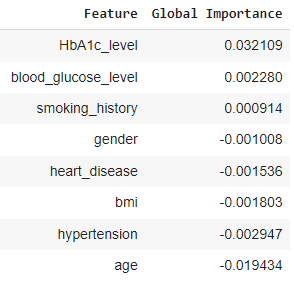


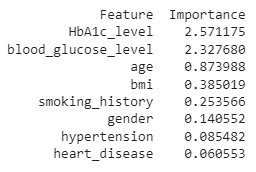

In [ ]:
shap = ShapKernel(gbm, X_train[:500])
shap_local = shap.explain_local(X_test[:5], y_test[:5])

show(shap_local, 0)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
show(shap.explain_local(X_test[:3],y_test[:3]),0)

AttributeError: ignored

In [ ]:
lime = LimeTabular(gbm, X_train)
show(lime.explain_local(X_test[:10], y_test[:10]), 0)

In [ ]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

from interpret import show
from interpret.blackbox import ShapKernel

seed = 42
np.random.seed(seed)
X, y = load_breast_cancer(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=seed)

pca = PCA()
rf = RandomForestClassifier(random_state=seed)

blackbox_model = Pipeline([('pca', pca), ('rf', rf)])
blackbox_model.fit(X_train, y_train)

shap = ShapKernel(blackbox_model, X_train)
shap_local = shap.explain_local(X_test[:5], y_test[:5])

show(shap_local, 0)

In [ ]:
import shap

# Initialize an explainer object with the trained gbm and feature names
explainer = shap.Explainer(gbm, feature_names=X.columns)

# Calculate SHAP values for all instances in the test set
shap_values = explainer.shap_values(X_test)

# Calculate the global importance of features
global_importance = shap_values.mean(axis=0)

# Create a DataFrame to store the global importance values along with feature names
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': global_importance})

# Sort the DataFrame in descending order of importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Change the name of a column
feature_importance_df = feature_importance_df.rename(columns={'Importance': 'Global Importance'})

feature_importance_df

,Feature,Global Importance
6,HbA1c_level,0.032109
7,blood_glucose_level,0.002280
5,smoking_history,0.000914
0,gender,-0.001008
3,heart_disease,-0.001536
4,bmi,-0.001803
2,hypertension,-0.002947
1,age,-0.019434


In [ ]:
# Select the SHAP values of only the correct predictions
correct_pred_shap_values = shap.TreeExplainer(gbm).shap_values(X_test[y_pred == y_test])

# Calculate the global importance of features
global_importance = np.abs(correct_pred_shap_values).mean(axis=0)

# Create a DataFrame to store the global importance values along with feature names
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': global_importance})

# Sort the DataFrame in descending order of importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance
print(feature_importance_df)

               Feature  Importance
6          HbA1c_level    2.571175
7  blood_glucose_level    2.327680
1                  age    0.873988
4                  bmi    0.385019
5      smoking_history    0.253566
0               gender    0.140552
2         hypertension    0.085482
3        heart_disease    0.060553


#Extras 2

In [ ]:
!pip install pymc3

In [ ]:
X.shape

(100000, 8)

In [ ]:
!pip install  scipy


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --update


In [ ]:
!pip install --upgrade theano==1.0.5 pymc3==3.11.4 arviz==0.11.2
!pip install --upgrade numpy scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 23.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.5/869.5 kB 47.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 40.9 MB/s eta 0:00:00
  Created wheel for theano: filename=Theano-1.0.5-py3-none-any.whl size=2668109 sha256=5866e7c0b4de3a791ab7d5b20ae60d0cf999378e18dbe89f1c1a144c2f488531
  Stored in directory: /root/.cache/pip/wheels/d9/e6/7d/2267d21a99e4ab8276f976f293b4ff23f50c9d809f4a216ebb
Successfully built theano
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
  Attempting uninstall: arviz
    Found existing installation: arviz 0.12.1
    Uninstalling arviz-0.12.1:
      Successfully uninstalled arviz-0.12.1
  Attempting uninstall: pymc3
    Found existing installation: pymc3 3.11.5
    Uninstal

env: MKL_THREADING_LAYER=GNU


In [ ]:
import pymc3 as pm
import numpy as np

# Set the MKL_THREADING_LAYER environment variable
%env MKL_THREADING_LAYER=GNU

# Generate synthetic data
np.random.seed(0)
X = np.random.randn(100, 2)
y = np.random.binomial(1, 0.5, size=100)

# Define the logistic regression model
with pm.Model() as logistic_model:
    # Priors for coefficients
    beta = pm.Normal('beta', mu=0, sd=10, shape=X.shape[1])
    # Linear combination of predictors
    mu = pm.math.dot(X, beta)
    # Logistic transformation
    p = pm.math.sigmoid(mu)
    # Likelihood
    y_obs = pm.Bernoulli('y_obs', p=p, observed=y)

    # Use MCMC sampling to estimate the posterior distribution
    trace = pm.sample(2000, tune=1000, return_inferencedata=True)

# Calculate posterior predictive samples
with logistic_model:
    ppc = pm.sample_posterior_predictive(trace, var_names=['beta', 'y_obs'], samples=1000)

# Calculate the mean and credible interval for predictions
mean_prediction = ppc['y_obs'].mean(axis=0)
lower_bound = np.percentile(ppc['y_obs'], 2.5, axis=0)
upper_bound = np.percentile(ppc['y_obs'], 97.5, axis=0)

# Print the uncertainty measures for the first few predictions
for i in range(5):
    print(f"Prediction {i+1}: Mean={mean_prediction[i]}, "
          f"Credible Interval=[{lower_bound[i]}, {upper_bound[i]}]")


ImportError: ignored

In [ ]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
input_shape = 8
num_classes = 2
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(input_shape,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(num_classes)
])

# Define the loss function
def negative_log_likelihood(y_true, y_pred):
    return -y_pred.log_prob(y_true)

# Define the prior distribution
def prior(kernel_size, bias_size, dtype=None):
    n = kernel_size + bias_size
    prior_model = tf.keras.Sequential([
        tfp.layers.VariableLayer(2*n, dtype=dtype),
        tfp.layers.DistributionLambda(lambda t: tfd.Independent(
            tfd.Normal(loc=t[:n], scale=1),
            reinterpreted_batch_ndims=1)),
        tfp.layers.DistributionLambda(lambda t: tfd.Independent(
            tfd.Normal(loc=t[n:], scale=1),
            reinterpreted_batch_ndims=1)),
    ])
    return prior_model

# Define the posterior distribution
def posterior(kernel_size, bias_size, dtype=None):
    n = kernel_size + bias_size
    posterior_model = tf.keras.Sequential([
        tfp.layers.VariableLayer(2*n, dtype=dtype),
        tfp.layers.DistributionLambda(lambda t: tfd.Independent(
            tfd.Normal(loc=t[:n], scale=1),
            reinterpreted_batch_ndims=1)),
        tfp.layers.DistributionLambda(lambda t: tfd.Independent(
            tfd.Normal(loc=t[n:], scale=1),
            reinterpreted_batch_ndims=1)),
    ])
    return posterior_model

# Define the model with the prior and posterior distributions
model = tf.keras.Sequential([
    tfp.layers.DenseVariational(32, posterior_fn=posterior, prior_fn=prior,
                                kl_weight=1/input_shape, activation='relu',
                                input_shape=(input_shape,)),
    tfp.layers.DenseVariational(32, posterior_fn=posterior, prior_fn=prior,
                                kl_weight=1/input_shape, activation='relu'),
    tfp.layers.DenseVariational(num_classes, posterior_fn=posterior, prior_fn=prior,
                                kl_weight=1/input_shape),
    tfp.layers.DistributionLambda(lambda t: tfd.Categorical(logits=t)),
])

# Compile the model
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.001),
              loss=negative_log_likelihood,
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

TypeError: ignored

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
import numpy as np

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a binary classifier (e.g., logistic regression)
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Obtain the predicted probabilities from the classifier
pred_prob = clf.predict_proba(X_test)[:, 1]

# Perform Platt scaling to calibrate the probabilities
calibrated_prob = (pred_prob - clf.intercept_) / clf.coef_[0]

# Calculate the difference between the predicted probability and the calibrated probability
uncertainty = np.abs(pred_prob - calibrated_prob)

# Calculate the log loss of the original and calibrated probabilities
original_log_loss = log_loss(y_test, pred_prob)
calibrated_log_loss = log_loss(y_test, calibrated_prob)

# Print the uncertainty and log loss measures
print("Uncertainty (Difference):")
print(uncertainty)
print("\nOriginal Log Loss:", original_log_loss)
print("Calibrated Log Loss:", calibrated_log_loss)


ValueError: ignored

In [ ]:
---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
<ipython-input-1-393a53262c54> in <cell line: 21>()
     19
     20 # Perform Platt scaling to calibrate the probabilities
---> 21 calibrated_prob = (pred_prob - clf.intercept_) / clf.coef_[0]
     22
     23 # Calculate the difference between the predicted probability and the calibrated probability

ValueError: operands could not be broadcast together with shapes (200,) (10,)

SyntaxError: ignored

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


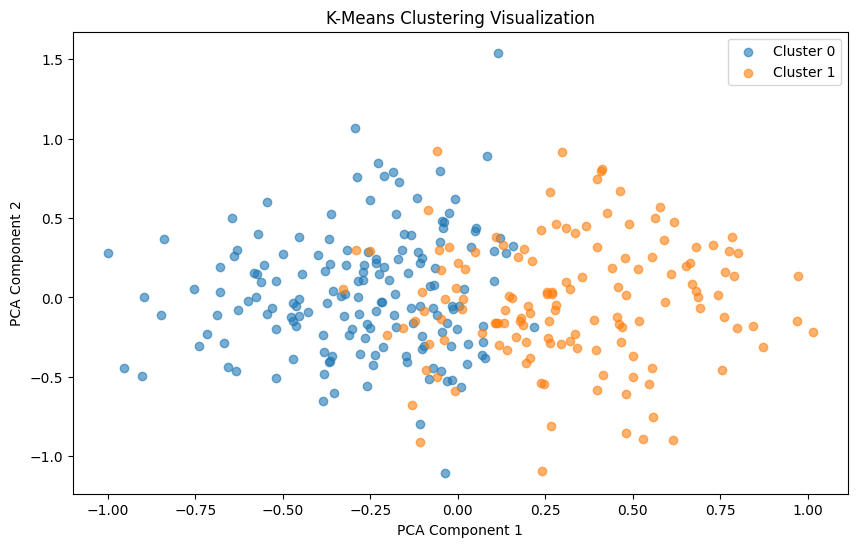

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Create a synthetic DataFrame with 51 features
np.random.seed(42)
n_samples = 300
n_features = 51

data = np.random.rand(n_samples, n_features)
df = pd.DataFrame(data, columns=[f'feature_{i+1}' for i in range(n_features)])

# Perform K-Means clustering
n_clusters = 2
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(df)

# Perform PCA for visualization (reduce dimensionality to 2)
pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(df.drop('cluster', axis=1)), columns=['PCA1', 'PCA2'])
df_pca['cluster'] = df['cluster']

# Visualize the clusters in a scatter plot
plt.figure(figsize=(10, 6))
for cluster_id in range(n_clusters):
    cluster_data = df_pca[df_pca['cluster'] == cluster_id]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster_id}', alpha=0.6)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering Visualization')
plt.legend()
plt.show()
